# **Namespaces**
A namespace is a space that holds names(identifiers).Programmatically speaking, namespaces are dictionary of identifiers(keys) and their objects(values)

***NOTE:*** Identifiers: function name, class name, variable name.

There are 4 types of namespaces:

- Builtin Namespace
- Global Namespace
- Enclosing Namespace
- Local Namespace



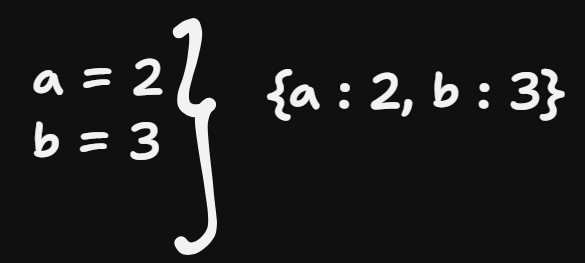


# **Scope**
A scope is a textual region of a Python program where a namespace is directly accessible.

# **LEGB Rule**
The interpreter searches for a name from the inside out, looking in the local, enclosing, global, and finally the built-in scope. If the interpreter doesn’t find the name in any of these locations, then Python raises a NameError exception.


To learn visualy go to the `pythontutor[dot]com`.

LOCAL -> ENCLOSED -> GLOBAL -> BUILTIN

1. **Local (L):** Variables defined **inside a function** and accessible only within that function.  
2. **Enclosing (E):** Variables defined in the **outer (enclosing) function** of a **nested function**.  
3. **Global (G):** Variables defined at the **top level of a module** or declared as **global** inside a function.  
4. **Built-in (B):** Predefined names in Python, like **`print()`**, **`len()`**, and **`max()`**, available **everywhere** in the program.

## **Hands-on Local and Global Scopes**

In [1]:
# Local and Global
# Global scope
a = 2

def temp():
  # Local scope
  b = 3
  print(b)

temp()
print(a)

3
2


In [2]:
# Local and Global -> Same Name
# Global scope
a = 2

def temp():
  # Local scope
  a = 3
  print(a)

temp()
print(a)

3
2


In [3]:
# local and global -> local does not have but global has
a = 2

def temp():
  # Local Variable
  print(a)

temp()
print(a)

2
2


In [4]:
# local and global -> editing global
# We can use the global variable in our local however we cannot perform editing on that.
# We can read but we cannot write that variable.
a = 2

def temp():
  # local var
  a += 1
  print(a)

temp()
print(a)

UnboundLocalError: local variable 'a' referenced before assignment

In [5]:
# To have the editing that global variable we have to do
a = 2

def temp():
  # local var
  global a
  a += 1
  print(a)

temp()
print(a)

3
3


In [6]:
# local and global -> global created inside local
def temp():
  # local var
  global a
  a = 1
  print(a)

temp()
print(a)

1
1


In [7]:
# local and global -> function parameter is local
def temp(z):
  # Local Variable
  print(z)

a = 5
temp(5)
print(a)
print(z) # Z is a local variable

5
5


NameError: name 'z' is not defined

## **Built in Scope**

In [8]:
import builtins
print(dir(builtins))

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EncodingWarning', 'EnvironmentError', 'Exception', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'StopIteration', 'SyntaxError', 'SyntaxWar

In [9]:
print('Hello')

Hello


In [12]:
# Renaming built-ins
L = [1,2,3]
print(max(L))
def max():
  print('hello')

print(max(L))
"""
The code raises a TypeError on the second print(max(L)) because the
built-in max() function is overridden by a custom function named max()
which takes no arguments, causing a conflict.
"""

TypeError: max() takes 0 positional arguments but 1 was given

## **Enclosing Scope**

In [13]:
def outer():
  def inner():
    print("Inner Function")
  inner()
  print("Outer Function")

outer()
print("Main Program")

Inner Function
Outer Function
Main Program


Here you can see that there will be three scopes simultaneously and then there will be a question which will be the enclosed one. The all three scopes are: global, outer, inner. The global one is the Main Program, the inner function one is the Local one, and the outer function is the Enclosing scope.

Sometimes this enclosing scope is also called the Non Local Keyword.



In [14]:
# Non Local keyword
def outer():
  a = 1
  def inner():
    nonlocal a
    a += 1
    print('Inner',a)
  inner()
  print('Outer',a)


outer()
print('Main program')

inner 2
outer 2
main program


# **Decorators**
A decorator in python is a function that receives another function as input and adds some functionality(decoration) to and it and returns it.

This can happen only because python functions are 1st class citizens.

There are 2 types of decorators available in python

- Built in decorators like `@staticmethod`, `@classmethod`, `@abstractmethod` and `@property` etc
- User defined decorators that we programmers can create according to our needs

*******

Decorators ek special function hote hain jo kisi dusre function ya class ko modify ya enhance karne ke liye use kiye jaate hain, bina uska original code change kiye.

*******

A function that extends the behavior of another function without modifying the base function.

Pass the base function as an argument to the decorator

```python
@add_sprinkles
get_ice_cream("Vanilla)
```

In [15]:
def func():
  print('HELLO')

a = func()
func()

HELLO
HELLO


In [17]:
def add_sprinkles(func):
  def wrapper():
    print("You add Sprinkles")
    func()
  return wrapper

@add_sprinkles
def get_ice_cream():
  print("Here is your Icecream")

get_ice_cream()

You add Sprinkles
Here is your Icecream


In [18]:
# Decorator
def modify(func, num):
  return func(num)

# Input
def sqaure(num):
  return num ** 2

modify(sqaure, 2)

4

In [21]:
# Simple Decorator
def my_decorator(func):
  def wrapper():
    print("***************************")
    func()
    print("***************************")
  return wrapper

def hello():
  print('Hello')

def display():
  print("Hello Vayishu")

a = my_decorator(hello)
a()

b = my_decorator(display)
b()

***************************
Hello
***************************
***************************
Hello Vayishu
***************************


In [22]:
# Simple Decorator
def my_decorator(func):
  def wrapper():
    print("***************************")
    func()
    print("***************************")
  return wrapper

@my_decorator
def hello():
  print('Hello')

@my_decorator
def display():
  print("Hello Vayishu")

hello()
display()

***************************
Hello
***************************
***************************
Hello Vayishu
***************************


In [32]:
# Making a function that will show the execution time of that function
import time

def timer(func):
  def wrapper():
    start = time.time()
    func()
    print("Time taken by the function: ", func.__name__, " function is " , time.time()-start, " seconds")
  return wrapper

@timer
def hello():
  print("Hello Universe")
  time.sleep(2)

@timer
def display():
  print("Display Function is dislaying something")
  time.sleep(4)

hello()
display()




'''
Here there is a major problem the decorator function: timer function is calling the
func() with no arguments where as if we make a mathematical function then the
wrapper function would throw an error. Reason: The wrapper didn't had any positional arguments
to send to the func().

To solve this we are showing in the next cell.
'''

Hello Universe
Time taken by the function:  hello  function is  2.0021843910217285  seconds
Display Function is dislaying something
Time taken by the function:  display  function is  4.006589889526367  seconds


"\nHere there is a major problem the decorator function: timer function is calling the \nfunc() with no arguments where as if we make a mathematical function then the \nwrapper function would throw an error. Reason: The wrapper didn't had any positional arguments\nto send to the func().\n"

In [37]:
import time

def timer(func):
  def wrapper(*args):
    start = time.time()
    func(*args)
    print("Time taken by the function: ", func.__name__, " function is " , time.time()-start, " seconds")
  return wrapper

@timer
def hello():
  print("Hello Universe")
  time.sleep(2)

@timer
def display():
  print("\nDisplay Function is dislaying something")
  time.sleep(4)

@timer
def square(num):
  time.sleep(1)
  print("\nSquare is: ", num ** 2)

hello()
display()
square(14)

Hello Universe
Time taken by the function:  hello  function is  2.0021910667419434  seconds

Display Function is dislaying something
Time taken by the function:  display  function is  4.004076957702637  seconds

Square is:  196
Time taken by the function:  square  function is  1.0011718273162842  seconds


Suppose if you have given a wrong datatype and you need to print correctly then you have to make a wrapper in which you need to check the type of the datatype.

In [45]:
def sanity_check(data_type):
  def outer_wrapper(func):
    def inner_wrapper(*args):
      if type(args[0] == data_type):
        func(*args)
      else:
        raise TypeError("This datatype will not work")
    return inner_wrapper
  return outer_wrapper

@sanity_check(int)
def square(num):
  print(f"Sqaure of the number {num} is: {num ** 2}")

@sanity_check(str)
def greet(name):
  print(f"Hello, {name}")

sqaure(17)
greet("Vayishu")

Hello, Vayishu
